<a href="https://colab.research.google.com/github/vijayshankarrealdeal/GoogleColab/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
class RNN(nn.Module):
  def __init__(self,n_input,n_output,n_hidden,n_rnnlayers):
    super(RNN,self).__init__()
    self.D = n_input
    self.M = n_hidden
    self.K = n_output
    self.L = n_rnnlayers
    self.rnn = nn.RNN(
        input_size = self.D,
        hidden_size = self.M,
        num_layers = self.L,
        nonlinearity = 'relu',
        batch_first = True,
    )
    self.fc = nn.Linear(self.M,self.K)

  def forward(self,X):
    h0 = torch.zeros(self.L,X.size(0),self.M).to(device)

    out,_ = self.rnn(X,h0)

    out = self.fc(out[:,-1,:])
    return out


In [4]:
model = RNN(n_input = 1,n_hidden=5,n_output=1,n_rnnlayers=1).to(device)

In [5]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 0.01)


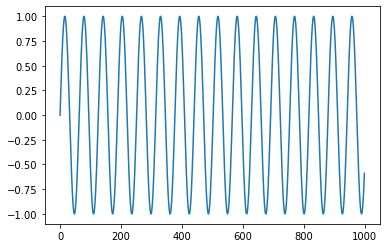

In [7]:
N = 1000
series = np.sin(0.1*np.arange(N))
plt.plot(series)
plt.show()

In [13]:
T = 10
X = []
Y = []
for t in range(len(series)-T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1,T,1)
Y = np.array(Y).reshape(-1,1)
N = len(X)

In [14]:
X_train = torch.from_numpy(X[:-N//2].astype(np.float32)).to(device)
Y_train = torch.from_numpy(Y[:-N//2].astype(np.float32)).to(device)
X_test = torch.from_numpy(X[-N//2:].astype(np.float32)).to(device)
Y_test = torch.from_numpy(Y[-N//2:].astype(np.float32)).to(device)